In [3]:
import requests
import time
import matplotlib.pyplot as plt

# NY Times

In [4]:
# NY TIMES API 
api_key = 'gkHhhsov9LrY3D0rs7UybUHaytbIAmve'

In [37]:
# Getting all relevant articles for last 5 years
all_articles = []
stats_dict={}
article_filter = ['News', 'Op-Ed', 'News Analysis', 'Editorial']
year_totals = []

for year in range(2015,2020):
    count_total = 0
    count_relevant = 0
    for month in range(1,13):
        time.sleep(10) # Adding time delay to not hit API calls per minute limit
        url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json?&api-key='+api_key
        response = requests.get(url)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['docs']
        # Filtering articles which have 'type_of_material' key
        articles = [a for a in articles if 'type_of_material' in a]
        relevant_articles = [a for a in articles if a['type_of_material'] in article_filter]
        count_total+=len(articles)
        count_relevant+=len(relevant_articles)
        year_totals.append(count_relevant)
        # Populating stats for each article category per year
        stats_dict[year] = {}
        for type_ in article_filter:
            stats_dict[year][type_] = len([a for a in relevant_articles if a['type_of_material']==type_])
        break
    print("% Relevant articles in year "+str(year)+": ", (count_relevant/count_total)*100)

% Relevant articles in year 2015:  44.55487961614257
% Relevant articles in year 2016:  50.641025641025635
% Relevant articles in year 2017:  72.69932756964457
% Relevant articles in year 2018:  77.11913778036703
% Relevant articles in year 2019:  77.92734114922565


In [38]:
stats_dict

{2015: {'News': 4661, 'Op-Ed': 363, 'News Analysis': 11, 'Editorial': 165},
 2016: {'News': 3530, 'Op-Ed': 247, 'News Analysis': 1, 'Editorial': 93},
 2017: {'News': 3378, 'Op-Ed': 274, 'News Analysis': 18, 'Editorial': 114},
 2018: {'News': 4647, 'Op-Ed': 534, 'News Analysis': 20, 'Editorial': 94},
 2019: {'News': 4795, 'Op-Ed': 502, 'News Analysis': 32, 'Editorial': 55}}

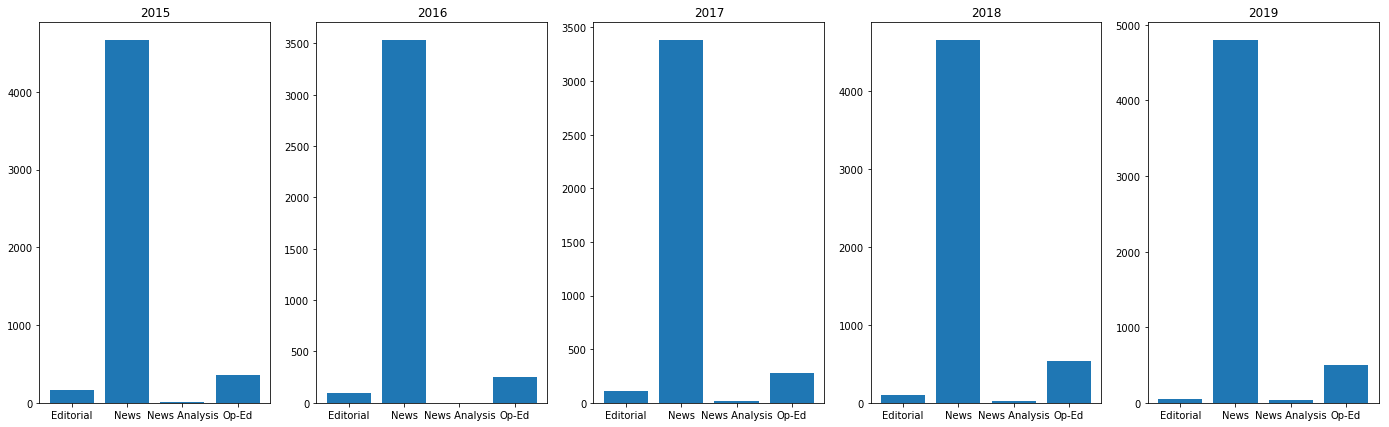

In [39]:
# Plotting stats_dict yearwise
fig,ax = plt.subplots(1,5,figsize=(24,7))
for i,year in enumerate(stats_dict.keys()):
    lists = sorted(stats_dict[year].items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax[i].bar(x, y)
    ax[i].set_title(str(year))
plt.show()

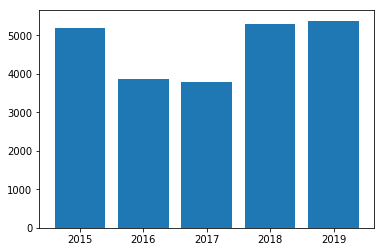

In [40]:
# Yearwise relevant articles
plt.bar(list(stats_dict.keys()), year_totals)
plt.show()